In [1]:
import os
os.getcwd()

'/content'

In [2]:
import pandas as pd

file_path = '/content/churn_data.xlsx'
df = pd.read_excel(file_path)
print("\nFirst few rows of the dataframe:")
display(df.head())

print("\nData Shape:")
print(df.shape)


First few rows of the dataframe:


,customerID,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Loan Account,Netbanking,...,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Monthly Average Balance (USD),Yearly Average Balance (USD),Churn,Customer Feedback,Category,Recommendation
0,5522-JBWMO,Male,0,No,Yes,1.0,Yes,No,general loan,No,...,No,No,Month-to-month,No,44.0,44,No,My Credit Card is not generating OTP.,Credit Card,NaN
1,5275-PMFUT,Male,0,Yes,Yes,72.0,No,No,general loan,Yes,...,Yes,Yes,Two year,Yes,64.8,4719.75,No,The Current Account charges are too high.,Current Account,NaN
2,5609-CEBID,Female,1,No,No,20.0,Yes,Yes,top up loan,No,...,No,Yes,Month-to-month,Yes,94.1,1782.4,Yes,The loan prepayment charges are too high.,Loans,NaN
3,4381-MHQDC,Female,0,No,No,47.0,Yes,Yes,general loan,Yes,...,No,No,Two year,Yes,65.0,2879.9,No,The Savings Account opening process was very s...,Savings Account,NaN
4,6353-BRMMA,Female,0,Yes,Yes,54.0,Yes,Yes,top up loan,Yes,...,Yes,Yes,Month-to-month,Yes,104.1,5645.8,No,The loan documentation process is very complic...,Loans,NaN



Data Shape:
(999, 23)


In [3]:
df.columns

Index(['customerID', 'Gender', 'Senior Citizen', 'Marital Status',
       'Dependents', 'tenure in months', 'Priority Account', 'Credit Cards',
       'Loan Account', 'Netbanking', 'Debit Card', 'MobileApp',
       'TechSupport Availed', 'Zero Balance Account', 'FDs',
       'Interest Deposited', 'Paperless Banking',
       'Monthly Average Balance (USD)', 'Yearly Average Balance (USD)',
       'Churn', 'Customer Feedback', 'Category', 'Recommendation'],
      dtype='object')

In [4]:
df.describe()

,Senior Citizen,tenure in months,Monthly Average Balance (USD),Recommendation
count,999.000000,994.000000,995.000000,0.0
mean,0.163163,32.247485,66.455578,NaN
std,0.369700,24.800698,29.922493,NaN
min,0.000000,0.000000,18.950000,NaN
25%,0.000000,8.000000,42.000000,NaN
50%,0.000000,29.000000,74.250000,NaN
75%,0.000000,56.000000,90.050000,NaN
max,1.000000,72.000000,116.250000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customerID                     999 non-null    object 
 1   Gender                         999 non-null    object 
 2   Senior Citizen                 999 non-null    int64  
 3   Marital Status                 999 non-null    object 
 4   Dependents                     997 non-null    object 
 5   tenure in months               994 non-null    float64
 6   Priority Account               997 non-null    object 
 7   Credit Cards                   997 non-null    object 
 8   Loan Account                   998 non-null    object 
 9   Netbanking                     998 non-null    object 
 10  Debit Card                     999 non-null    object 
 11  MobileApp                      999 non-null    object 
 12  TechSupport Availed            998 non-null    obj

Checking the missing values for each columns

In [72]:

missing_values = df.isnull().sum()

numerical_columns = ["tenure in months", "Monthly Average Balance (USD)"]
outliers = df[numerical_columns].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])
missing_values, outliers

(customerID                         0
 Gender                             0
 Senior Citizen                     0
 Marital Status                     0
 Dependents                         2
 tenure in months                   5
 Priority Account                   2
 Credit Cards                       2
 Loan Account                       1
 Netbanking                         1
 Debit Card                         0
 MobileApp                          0
 TechSupport Availed                1
 Zero Balance Account               2
 FDs                                4
 Interest Deposited                 0
 Paperless Banking                  2
 Monthly Average Balance (USD)      4
 Yearly Average Balance (USD)       4
 Churn                             16
 Customer Feedback                  0
 Category                          27
 Recommendation                   999
 dtype: int64,
        tenure in months  Monthly Average Balance (USD)
 count        994.000000                     995.000000

Recommendation column is totally empty, so dropping the column

In [73]:
df.drop(columns=["Recommendation"], inplace=True)

categorical_cols = ["Dependents", "Priority Account", "Credit Cards", "Loan Account",
                    "Netbanking", "TechSupport Availed", "Zero Balance Account",
                    "FDs", "Paperless Banking", "Category", "Churn"]

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

numerical_cols = ["tenure in months", "Monthly Average Balance (USD)"]
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

df["Yearly Average Balance (USD)"] = pd.to_numeric(df["Yearly Average Balance (USD)"], errors='coerce')

df.isnull().sum()

<ipython-input-73-722decfd261a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-73-722decfd261a>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,0
customerID,0
Gender,0
Senior Citizen,0
Marital Status,0
Dependents,0
tenure in months,0
Priority Account,0
Credit Cards,0
Loan Account,0
Netbanking,0


In [74]:
df["Yearly Average Balance (USD)"].fillna(df["Yearly Average Balance (USD)"].median(), inplace=True)

<ipython-input-74-88bb49ac05ae>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Yearly Average Balance (USD)"].fillna(df["Yearly Average Balance (USD)"].median(), inplace=True)


In [75]:
df.isnull().sum()

,0
customerID,0
Gender,0
Senior Citizen,0
Marital Status,0
Dependents,0
tenure in months,0
Priority Account,0
Credit Cards,0
Loan Account,0
Netbanking,0


Encoding categorical values for binary categories (0 and 1) and one-hot for others

In [76]:
from sklearn.preprocessing import LabelEncoder

binary_columns = ["Gender", "Senior Citizen", "Marital Status", "Dependents", "Priority Account",
                  "Credit Cards", "Netbanking", "Debit Card", "MobileApp", "TechSupport Availed",
                  "Zero Balance Account", "FDs", "Interest Deposited", "Paperless Banking", "Churn"]

for col in binary_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, columns=["Loan Account", "Category"], drop_first=True)

df.head()

,customerID,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Netbanking,Debit Card,...,Category_Debit Card,Category_Debit Cards,Category_Fixed Deposit,Category_General,Category_Loans,Category_Mobile,Category_Mobile Banking,Category_Online Banking,Category_Savings,Category_Savings Account
0,5522-JBWMO,1,0,0,1,1.0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,5275-PMFUT,1,0,1,1,72.0,0,0,1,1,...,False,False,False,False,False,False,False,False,False,False
2,5609-CEBID,0,1,0,0,20.0,1,1,0,1,...,False,False,False,False,True,False,False,False,False,False
3,4381-MHQDC,0,0,0,0,47.0,1,1,1,0,...,False,False,False,False,False,False,False,False,False,True
4,6353-BRMMA,0,0,1,1,54.0,1,1,1,1,...,False,False,False,False,True,False,False,False,False,False


In [77]:
df["Category"].head()

KeyError: 'Category'

<ipython-input-78-8ac8654ceabe>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Churn"], palette="viridis")


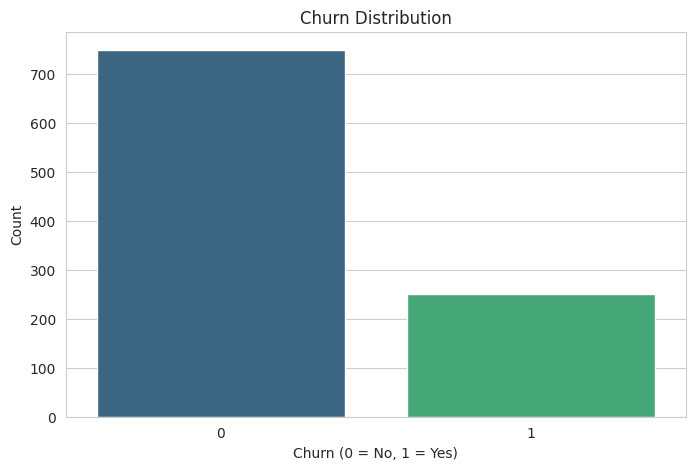

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

sns.countplot(x=df["Churn"], palette="viridis")
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

Correlatino matrix for checking which features affects the most, churn

from the distribution we can see, the churn distribution is skewed more towards no, having more samples with customer who churned

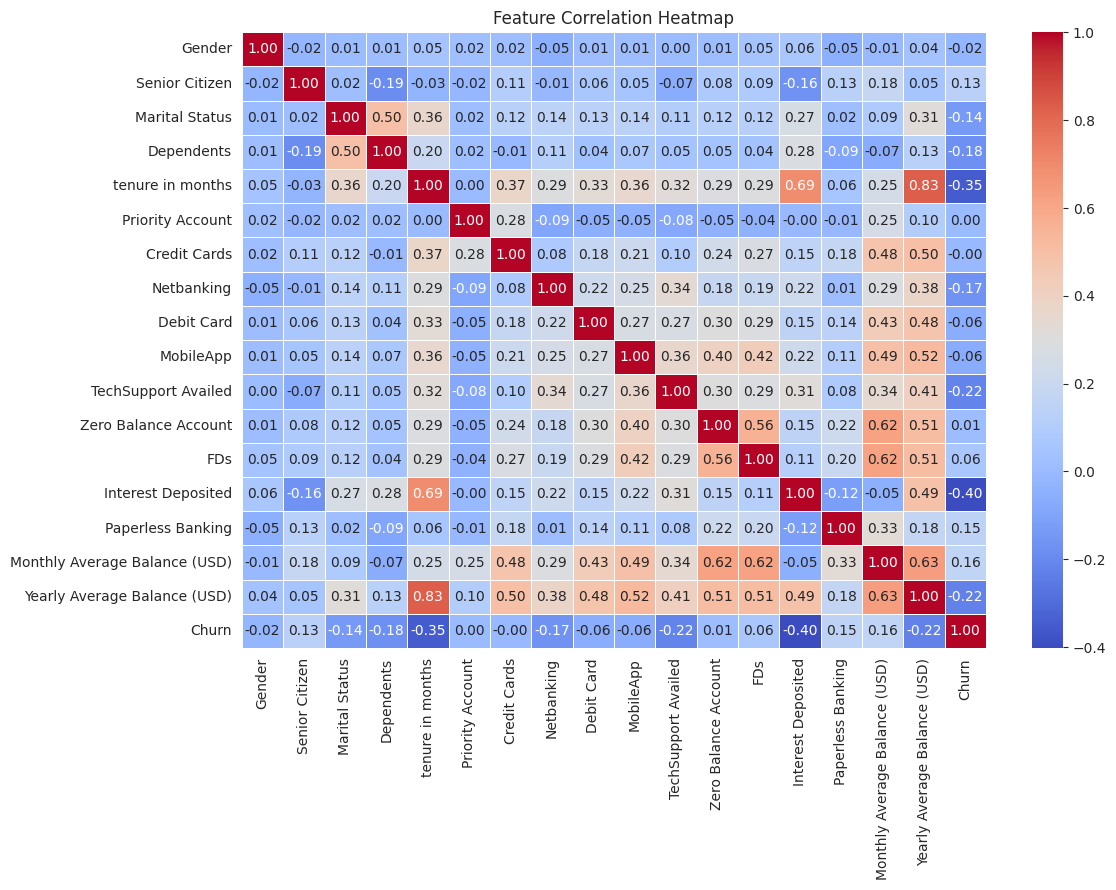

In [79]:
corr_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Creating dataset for training

so, from the heatmap we can see, attributes most affecting churn is:
-----> tenure in months: people having long tenure, less likely to churn (-0.35)
-----> interest Deposited: people deposited interest frequently and timely, less likely to chun (-0.40)
-----> TechSupport Availed: (-0.22)

In [80]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Churn"])
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((799, 36), (200, 36), (799,), (200,))

standardScaler for numerical values

In [81]:
from sklearn.preprocessing import StandardScaler

numerical_features = ["tenure in months", "Monthly Average Balance (USD)", "Yearly Average Balance (USD)"]

scaler = StandardScaler()

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

X_train.head()


,customerID,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Netbanking,Debit Card,...,Category_Debit Card,Category_Debit Cards,Category_Fixed Deposit,Category_General,Category_Loans,Category_Mobile,Category_Mobile Banking,Category_Online Banking,Category_Savings,Category_Savings Account
538,8606-CIQUL,1,1,1,1,1.648853,1,1,1,1,...,False,False,False,False,False,False,True,False,False,False
568,7123-WQUHX,1,0,0,0,0.262596,1,1,0,0,...,False,True,False,False,False,False,False,False,False,False
800,4572-DVCGN,0,0,0,0,-0.879028,1,0,0,0,...,False,False,False,False,False,False,True,False,False,False
231,2359-KMGLI,1,0,0,0,-0.308216,1,1,0,1,...,False,False,False,False,False,False,False,False,False,False
874,2085-JVGAD,1,0,1,0,0.221824,1,0,0,0,...,False,False,False,False,True,False,False,False,False,False


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

log_reg = LogisticRegression(random_state=42, max_iter=1000)

removing customerID and customer feedback column non-numeric columns before training

In [83]:
X_train_numeric = X_train.drop(columns=["customerID", "Customer Feedback"])
X_test_numeric = X_test.drop(columns=["customerID", "Customer Feedback"])

log_reg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
log_reg.fit(X_train_numeric, y_train)

y_pred_log_reg = log_reg.predict(X_test_numeric)

log_reg_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_log_reg),
    "Precision": precision_score(y_test, y_pred_log_reg),
    "Recall": recall_score(y_test, y_pred_log_reg),
    "F1 Score": f1_score(y_test, y_pred_log_reg)
}

log_reg_metrics


{'Accuracy': 0.715,
 'Precision': 0.4567901234567901,
 'Recall': 0.74,
 'F1 Score': 0.5648854961832062}

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_numeric, y_train)
y_pred_rf = rf_model.predict(X_test_numeric)

rf_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1 Score": f1_score(y_test, y_pred_rf)
}

rf_metrics

{'Accuracy': 0.795,
 'Precision': 0.6216216216216216,
 'Recall': 0.46,
 'F1 Score': 0.5287356321839081}

In [85]:
import joblib
joblib.dump(rf_model, 'rf_model.joblib')

['rf_model.joblib']

Extracting feature importance from Random Forest Model

In [86]:
X_train_numeric.columns

Index(['Gender', 'Senior Citizen', 'Marital Status', 'Dependents',
       'tenure in months', 'Priority Account', 'Credit Cards', 'Netbanking',
       'Debit Card', 'MobileApp', 'TechSupport Availed',
       'Zero Balance Account', 'FDs', 'Interest Deposited',
       'Paperless Banking', 'Monthly Average Balance (USD)',
       'Yearly Average Balance (USD)', 'Loan Account_general loan',
       'Loan Account_top up loan', 'Category_Branch Service',
       'Category_Credit Card', 'Category_Credit Cards',
       'Category_Current Account', 'Category_Customer Support',
       'Category_Debit Card', 'Category_Debit Cards', 'Category_Fixed Deposit',
       'Category_General', 'Category_Loans', 'Category_Mobile',
       'Category_Mobile Banking', 'Category_Online Banking',
       'Category_Savings', 'Category_Savings Account'],
      dtype='object')

In [87]:
len(X_train_numeric.columns)

34

In [23]:
feature_importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X_train_numeric.columns,
    "Importance": feature_importance
})

print("Printing features with sorted importance")
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
feature_importance_df

Printing features with sorted importance


,Feature,Importance
16,Yearly Average Balance (USD),0.146969
4,tenure in months,0.144651
13,Interest Deposited,0.135668
15,Monthly Average Balance (USD),0.124016
18,Loan Account_top up loan,0.043362
10,TechSupport Availed,0.031038
14,Paperless Banking,0.026155
7,Netbanking,0.025929
3,Dependents,0.022006
1,Senior Citizen,0.020950


In [24]:
from xgboost import XGBClassifier

churn_counts = y_train.value_counts()
scale_pos_weight = churn_counts[0] / churn_counts[1]

xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric="logloss", scale_pos_weight=scale_pos_weight)

xgb_model.fit(X_train_numeric, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:32:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [26]:
y_pred_xgb = xgb_model.predict(X_test_numeric)

In [27]:
xgb_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "F1 Score": f1_score(y_test, y_pred_xgb)
}

xgb_metrics

{'Accuracy': 0.75,
 'Precision': 0.5,
 'Recall': 0.62,
 'F1 Score': 0.5535714285714286}

Using a pre-trained sentiment analysis from BERT

In [28]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
df["BERT_Sentiment"] = df["Customer Feedback"].dropna().apply(lambda x: sentiment_pipeline(x)[0]['label'])
df[["Customer Feedback", "BERT_Sentiment"]].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentic

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


,Customer Feedback,BERT_Sentiment
0,My Credit Card is not generating OTP.,NEGATIVE
1,The Current Account charges are too high.,NEGATIVE
2,The loan prepayment charges are too high.,NEGATIVE
3,The Savings Account opening process was very s...,POSITIVE
4,The loan documentation process is very complic...,NEGATIVE


In [29]:
df.columns

Index(['customerID', 'Gender', 'Senior Citizen', 'Marital Status',
       'Dependents', 'tenure in months', 'Priority Account', 'Credit Cards',
       'Netbanking', 'Debit Card', 'MobileApp', 'TechSupport Availed',
       'Zero Balance Account', 'FDs', 'Interest Deposited',
       'Paperless Banking', 'Monthly Average Balance (USD)',
       'Yearly Average Balance (USD)', 'Churn', 'Customer Feedback',
       'Loan Account_general loan', 'Loan Account_top up loan',
       'Category_Branch Service', 'Category_Credit Card',
       'Category_Credit Cards', 'Category_Current Account',
       'Category_Customer Support', 'Category_Debit Card',
       'Category_Debit Cards', 'Category_Fixed Deposit', 'Category_General',
       'Category_Loans', 'Category_Mobile', 'Category_Mobile Banking',
       'Category_Online Banking', 'Category_Savings',
       'Category_Savings Account', 'BERT_Sentiment'],
      dtype='object')

In [30]:
df.head()

,customerID,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Netbanking,Debit Card,...,Category_Debit Cards,Category_Fixed Deposit,Category_General,Category_Loans,Category_Mobile,Category_Mobile Banking,Category_Online Banking,Category_Savings,Category_Savings Account,BERT_Sentiment
0,5522-JBWMO,1,0,0,1,1.0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,NEGATIVE
1,5275-PMFUT,1,0,1,1,72.0,0,0,1,1,...,False,False,False,False,False,False,False,False,False,NEGATIVE
2,5609-CEBID,0,1,0,0,20.0,1,1,0,1,...,False,False,False,True,False,False,False,False,False,NEGATIVE
3,4381-MHQDC,0,0,0,0,47.0,1,1,1,0,...,False,False,False,False,False,False,False,False,True,POSITIVE
4,6353-BRMMA,0,0,1,1,54.0,1,1,1,1,...,False,False,False,True,False,False,False,False,False,NEGATIVE


In [32]:
# import re

# def preprocess_text(text):
#     text = text.lower()
#     text = re.sub(r'http\S+', '', text)
#     text = re.sub(r'[^a-z\s]', '', text)
#     text = re.sub(r'\s+', ' ', text).strip()
#     return text

# df["Cleaned_Feedback"] = df["Customer Feedback"].dropna().apply(preprocess_text)

# df[["Customer Feedback", "Cleaned_Feedback"]].head()

,Customer Feedback,Cleaned_Feedback
0,My Credit Card is not generating OTP.,my credit card is not generating otp
1,The Current Account charges are too high.,the current account charges are too high
2,The loan prepayment charges are too high.,the loan prepayment charges are too high
3,The Savings Account opening process was very smooth.,the savings account opening process was very smooth
4,The loan documentation process is very complicated.,the loan documentation process is very complicated


In [33]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity
df["Sentiment Score"] = df["Cleaned_Feedback"].apply(get_sentiment)
df["Sentiment"] = df["Sentiment Score"].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))


df[["Customer Feedback", "Cleaned_Feedback", "Sentiment Score", "Sentiment"]].head()

,Customer Feedback,Cleaned_Feedback,Sentiment Score,Sentiment
0,My Credit Card is not generating OTP.,my credit card is not generating otp,0.00,Neutral
1,The Current Account charges are too high.,the current account charges are too high,0.08,Positive
2,The loan prepayment charges are too high.,the loan prepayment charges are too high,0.16,Positive
3,The Savings Account opening process was very smooth.,the savings account opening process was very smooth,0.52,Positive
4,The loan documentation process is very complicated.,the loan documentation process is very complicated,-0.65,Negative


In [34]:
df.head()

,customerID,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Netbanking,Debit Card,...,Category_Loans,Category_Mobile,Category_Mobile Banking,Category_Online Banking,Category_Savings,Category_Savings Account,BERT_Sentiment,Cleaned_Feedback,Sentiment Score,Sentiment
0,5522-JBWMO,1,0,0,1,1.0,1,0,0,0,...,False,False,False,False,False,False,NEGATIVE,my credit card is not generating otp,0.00,Neutral
1,5275-PMFUT,1,0,1,1,72.0,0,0,1,1,...,False,False,False,False,False,False,NEGATIVE,the current account charges are too high,0.08,Positive
2,5609-CEBID,0,1,0,0,20.0,1,1,0,1,...,True,False,False,False,False,False,NEGATIVE,the loan prepayment charges are too high,0.16,Positive
3,4381-MHQDC,0,0,0,0,47.0,1,1,1,0,...,False,False,False,False,False,True,POSITIVE,the savings account opening process was very smooth,0.52,Positive
4,6353-BRMMA,0,0,1,1,54.0,1,1,1,1,...,True,False,False,False,False,False,NEGATIVE,the loan documentation process is very complicated,-0.65,Negative


In [36]:
df.columns

Index(['customerID', 'Gender', 'Senior Citizen', 'Marital Status',
       'Dependents', 'tenure in months', 'Priority Account', 'Credit Cards',
       'Netbanking', 'Debit Card', 'MobileApp', 'TechSupport Availed',
       'Zero Balance Account', 'FDs', 'Interest Deposited',
       'Paperless Banking', 'Monthly Average Balance (USD)',
       'Yearly Average Balance (USD)', 'Churn', 'Customer Feedback',
       'Loan Account_general loan', 'Loan Account_top up loan',
       'Category_Branch Service', 'Category_Credit Card',
       'Category_Credit Cards', 'Category_Current Account',
       'Category_Customer Support', 'Category_Debit Card',
       'Category_Debit Cards', 'Category_Fixed Deposit', 'Category_General',
       'Category_Loans', 'Category_Mobile', 'Category_Mobile Banking',
       'Category_Online Banking', 'Category_Savings',
       'Category_Savings Account', 'BERT_Sentiment', 'Cleaned_Feedback',
       'Sentiment Score', 'Sentiment'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: 'Male'

In [42]:
df.head()

,customerID,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Loan Account,Netbanking,...,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Monthly Average Balance (USD),Yearly Average Balance (USD),Churn,Customer Feedback,Category,Recommendation
0,5522-JBWMO,Male,0,No,Yes,1.0,Yes,No,general loan,No,...,No,No,Month-to-month,No,44.0,44,No,My Credit Card is not generating OTP.,Credit Card,NaN
1,5275-PMFUT,Male,0,Yes,Yes,72.0,No,No,general loan,Yes,...,Yes,Yes,Two year,Yes,64.8,4719.75,No,The Current Account charges are too high.,Current Account,NaN
2,5609-CEBID,Female,1,No,No,20.0,Yes,Yes,top up loan,No,...,No,Yes,Month-to-month,Yes,94.1,1782.4,Yes,The loan prepayment charges are too high.,Loans,NaN
3,4381-MHQDC,Female,0,No,No,47.0,Yes,Yes,general loan,Yes,...,No,No,Two year,Yes,65.0,2879.9,No,The Savings Account opening process was very smooth.,Savings Account,NaN
4,6353-BRMMA,Female,0,Yes,Yes,54.0,Yes,Yes,top up loan,Yes,...,Yes,Yes,Month-to-month,Yes,104.1,5645.8,No,The loan documentation process is very complicated.,Loans,NaN


In [91]:
import pandas as pd
import joblib
import requests

#Loading my saved model
rf_model = joblib.load("rf_model.joblib")

# Load your preprocessed data (replace with your actual paths)
# X_train_numeric = pd.read_csv("X_train_numeric.csv") #replace with your files.
# X_test_numeric = pd.read_csv("X_test_numeric.csv")
# X_train_customer_ids = pd.read_csv("X_train_customer_ids.csv") #replace with your files.
# X_test_customer_ids = pd.read_csv("X_test_customer_ids.csv")
df = pd.read_excel("/content/churn_data.xlsx")

GROQ_API_KEY = "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"
GROQ_API_URL = "https://api.groq.com/openai/v1/chat/completions"

def analyze_sentiment(text, groq_api_key=GROQ_API_KEY):
    """Analyzes sentiment using the Groq API."""

    headers = {
        "Authorization": f"Bearer {groq_api_key}",
        "Content-Type": "application/json",
    }
    data = {
        "model": "mixtral-8x7b-32768",
        "messages": [
            {
                "role": "user",
                "content": f"Analyze the sentiment of the following text: '{text}'. Respond with only 'positive', 'negative', or 'neutral'.",
            }
        ],
    }

    try:
        response = requests.post(GROQ_API_URL, headers=headers, json=data)
        response.raise_for_status()
        sentiment = response.json()["choices"][0]["message"]["content"].strip().lower()
        if sentiment not in ["positive", "negative", "neutral"]:
            sentiment = "neutral"
        return sentiment
    except requests.exceptions.RequestException as e:
        print(f"Error during Groq API call: {e}")
        return "neutral"
def chatbot_handler(customer_id, user_query):
    """Handles chatbot interactions, predicts churn, and generates retention strategies."""

    customer_data = df[df['customerID'] == customer_id]

    if customer_data.empty:
        return f"Customer ID '{customer_id}' not found."

    customer_data = customer_data.iloc[0]
    if customer_id in X_train['customerID'].values:
      customer_row = X_train[X_train['customerID'] == customer_id].iloc[0]
    elif customer_id in X_test['customerID'].values:
      customer_row = X_test[X_test['customerID'] == customer_id].iloc[0]
    else:
      return f"Customer ID '{customer_id}' not found in preprocessed data."

    customer_row2 = customer_row.drop(["customerID", "Customer Feedback"])
    print(customer_row2, customer_row2.shape)
    # customer_row2 = pd.get_dummies(pd.Series(customer_row2)).reindex(columns=X_train.drop(columns = ["customerID", "Customer Feedback"]).columns, fill_value=0)
    # # Churn prediction
    # customer_row_reshaped = customer_row2.values.reshape(1, -1)
    #churn_probability = rf_model.predict_proba(customer_row_reshaped)[0][1]

    customer_row_df = pd.DataFrame([customer_row2])
    churn_probability = rf_model.predict_proba(customer_row_df)[0][1]
    #churn_probability = rf_model.predict_proba(customer_row2)#[0][1]
    churn_classification = "Churn" if churn_probability > 0.5 else "No Churn"

    #Sentiment Analysis
    user_sentiment = analyze_sentiment(user_query)

    context = f"Customer ID: {customer_id}. "
    for col in customer_data.index:
        context += f"{col}: {customer_data[col]}. "
    context += f"Churn Probability: {churn_probability:.2f}. Churn Classification: {churn_classification}. "
    context += f"User Query: {user_query}. User Query Sentiment: {user_sentiment}."

    headers = {
        "Authorization": f"Bearer {GROQ_API_KEY}",
        "Content-Type": "application/json",
    }
    data = {
        "model": "mixtral-8x7b-32768",
        "messages": [
            {
                "role": "user",
                "content": f"Generate a personalized retention strategy for the following customer: {context}. Focus on addressing their needs and high churn risk."
            }
        ],
    }

    try:
        response = requests.post(GROQ_API_URL, headers=headers, json=data)
        response.raise_for_status()
        retention_strategy = response.json()["choices"][0]["message"]["content"].strip()
        return retention_strategy
    except requests.exceptions.RequestException as e:
        return f"Error generating retention strategy: {e}"


customer_id = "5522-JBWMO"
user_query = "My internet is very slow, and I'm thinking of switching providers."

response = chatbot_handler(customer_id, user_query)
print(response)

Gender                                  1
Senior Citizen                          0
Marital Status                          0
Dependents                              1
tenure in months                -1.245978
Priority Account                        1
Credit Cards                            0
Netbanking                              0
Debit Card                              0
MobileApp                               0
TechSupport Availed                     0
Zero Balance Account                    0
FDs                                     0
Interest Deposited                      0
Paperless Banking                       0
Monthly Average Balance (USD)   -0.754853
Yearly Average Balance (USD)    -0.993826
Loan Account_general loan            True
Loan Account_top up loan            False
Category_Branch Service             False
Category_Credit Card                 True
Category_Credit Cards               False
Category_Current Account            False
Category_Customer Support         

In [69]:
len(X_train.columns)

27

In [52]:
X_train.columns

Index(['customerID', 'Gender', 'Senior Citizen', 'Marital Status',
       'Dependents', 'tenure in months', 'Priority Account', 'Credit Cards',
       'Netbanking', 'Debit Card', 'MobileApp', 'TechSupport Availed',
       'Zero Balance Account', 'FDs', 'Interest Deposited',
       'Paperless Banking', 'Monthly Average Balance (USD)',
       'Yearly Average Balance (USD)', 'Customer Feedback',
       'Loan Account_general loan', 'Loan Account_top up loan',
       'Category_Branch Service', 'Category_Credit Card',
       'Category_Credit Cards', 'Category_Current Account',
       'Category_Customer Support', 'Category_Debit Card',
       'Category_Debit Cards', 'Category_Fixed Deposit', 'Category_General',
       'Category_Loans', 'Category_Mobile', 'Category_Mobile Banking',
       'Category_Online Banking', 'Category_Savings',
       'Category_Savings Account'],
      dtype='object')

In [92]:
import pandas as pd
import joblib
import requests

rf_model = joblib.load("rf_model.joblib")
df = pd.read_excel("/content/churn_data.xlsx")

GROQ_API_KEY = "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"
GROQ_API_URL = "https://api.groq.com/openai/v1/chat/completions"

def analyze_sentiment(text, groq_api_key=GROQ_API_KEY):
    """Analyzes sentiment using the Groq API."""

    headers = {
        "Authorization": f"Bearer {groq_api_key}",
        "Content-Type": "application/json",
    }
    data = {
        "model": "mixtral-8x7b-32768",
        "messages": [
            {
                "role": "user",
                "content": f"Analyze the sentiment of the following text: '{text}'. Respond with only 'positive', 'negative', or 'neutral'.",
            }
        ],
    }

    try:
        response = requests.post(GROQ_API_URL, headers=headers, json=data)
        response.raise_for_status()
        sentiment = response.json()["choices"][0]["message"]["content"].strip().lower()
        if sentiment not in ["positive", "negative", "neutral"]:
            sentiment = "neutral"
        return sentiment
    except requests.exceptions.RequestException as e:
        print(f"Error during Groq API call: {e}")
        return "neutral"
def chatbot_handler(customer_id, user_query):
    """Handles chatbot interactions, predicts churn, and generates retention strategies."""

    customer_data = df[df['customerID'] == customer_id]

    if customer_data.empty:
        return f"Customer ID '{customer_id}' not found."

    customer_data = customer_data.iloc[0]


    if customer_id in X_train['customerID'].values:
      customer_row = X_train[X_train['customerID'] == customer_id].iloc[0]
    elif customer_id in X_test['customerID'].values:
      customer_row = X_test[X_test['customerID'] == customer_id].iloc[0]
    else:
      return f"Customer ID '{customer_id}' not found in preprocessed data."

    customer_row2 = customer_row.drop(["customerID", "Customer Feedback"])
    # print(customer_row2, customer_row2.shape)
    # customer_row2 = pd.get_dummies(pd.Series(customer_row2)).reindex(columns=X_train.drop(columns = ["customerID", "Customer Feedback"]).columns, fill_value=0)
    # # Churn prediction
    # customer_row_reshaped = customer_row2.values.reshape(1, -1)
    #churn_probability = rf_model.predict_proba(customer_row_reshaped)[0][1]

    customer_row_df = pd.DataFrame([customer_row2])
    churn_probability = rf_model.predict_proba(customer_row_df)[0][1]
    #churn_probability = rf_model.predict_proba(customer_row2)#[0][1]
    churn_classification = "Churn" if churn_probability > 0.5 else "No Churn"

    user_sentiment = analyze_sentiment(user_query)


    context = f"Customer ID: {customer_id}. "
    for col in customer_data.index:
        context += f"{col}: {customer_data[col]}. "
    context += f"Churn Probability: {churn_probability:.2f}. Churn Classification: {churn_classification}. "
    context += f"User Query: {user_query}. User Query Sentiment: {user_sentiment}."

    # Groq API for retention strategy
    # headers = {
    #     "Authorization": f"Bearer {GROQ_API_KEY}",
    #     "Content-Type": "application/json",
    # }
    # data = {
    #     "model": "mixtral-8x7b-32768",
    #     "messages": [
    #         {
    #             "role": "user",
    #             "content": f"Generate a personalized retention strategy for the following customer: {context}. Focus on addressing their needs and high churn risk."
    #         }
    #     ],
    # }

    # try:
    #     response = requests.post(GROQ_API_URL, headers=headers, json=data)
    #     response.raise_for_status()
    #     retention_strategy = response.json()["choices"][0]["message"]["content"].strip()
    #     return retention_strategy
    # except requests.exceptions.RequestException as e:
    #     return f"Error generating retention strategy: {e}"

    headers = {
    "Authorization": f"Bearer {GROQ_API_KEY}",
    "Content-Type": "application/json",
    }
    data = {
        "model": "mixtral-8x7b-32768",
        "messages": [
            {
                "role": "user",
                "content": f"""
                Given the following customer context: {context},
                generate a tailored communication plan to reduce churn risk and address the user's query.
                Also generate a concise chatbot response that directly addresses the users query.
                Format your response as follows:
                Communication Plan: [Your tailored communication plan here]
                Chatbot Response: [Your chatbot response here]
                """,
            }
        ],
    }

    try:
        response = requests.post(GROQ_API_URL, headers=headers, json=data)
        response.raise_for_status()
        response_content = response.json()["choices"][0]["message"]["content"].strip()


        communication_plan = ""
        chatbot_response = ""
        if "Communication Plan:" in response_content:
            communication_plan = response_content.split("Communication Plan:")[1].split("Chatbot Response:")[0].strip()
        if "Chatbot Response:" in response_content:
            chatbot_response = response_content.split("Chatbot Response:")[1].strip()

        return communication_plan, chatbot_response

    except requests.exceptions.RequestException as e:
        return f"Error generating retention strategy: {e}", f"An error occurred."


customer_id = "5522-JBWMO"
user_query = "My internet is very slow, and I'm thinking of switching providers."

response = chatbot_handler(customer_id, user_query)
print(response)

Gender                                  1
Senior Citizen                          0
Marital Status                          0
Dependents                              1
tenure in months                -1.245978
Priority Account                        1
Credit Cards                            0
Netbanking                              0
Debit Card                              0
MobileApp                               0
TechSupport Availed                     0
Zero Balance Account                    0
FDs                                     0
Interest Deposited                      0
Paperless Banking                       0
Monthly Average Balance (USD)   -0.754853
Yearly Average Balance (USD)    -0.993826
Loan Account_general loan            True
Loan Account_top up loan            False
Category_Branch Service             False
Category_Credit Card                 True
Category_Credit Cards               False
Category_Current Account            False
Category_Customer Support         

In [98]:
import pandas as pd
import joblib
import requests

# Load your trained model and scaler (if used)
rf_model = joblib.load("rf_model.joblib")
# scaler = joblib.load("scaler.joblib") #load scaler.

# Load your preprocessed data (replace with your actual paths)
# X_train_numeric = pd.read_csv("X_train_numeric.csv") #replace with your files.
# X_test_numeric = pd.read_csv("X_test_numeric.csv")
# X_train_customer_ids = pd.read_csv("X_train_customer_ids.csv") #replace with your files.
# X_test_customer_ids = pd.read_csv("X_test_customer_ids.csv")

df = pd.read_excel("/content/churn_data.xlsx")


GROQ_API_KEY = "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"
GROQ_API_URL = "https://api.groq.com/openai/v1/chat/completions"

def analyze_sentiment(text, groq_api_key=GROQ_API_KEY):
    """Analyzes sentiment using the Groq API."""

    headers = {
        "Authorization": f"Bearer {groq_api_key}",
        "Content-Type": "application/json",
    }
    data = {
        "model": "mixtral-8x7b-32768",
        "messages": [
            {
                "role": "user",
                "content": f"Analyze the sentiment of the following text: '{text}'. Respond with only 'positive', 'negative', or 'neutral'.",
            }
        ],
    }

    try:
        response = requests.post(GROQ_API_URL, headers=headers, json=data)
        response.raise_for_status()
        sentiment = response.json()["choices"][0]["message"]["content"].strip().lower()
        if sentiment not in ["positive", "negative", "neutral"]:
            sentiment = "neutral"
        return sentiment
    except requests.exceptions.RequestException as e:
        print(f"Error during Groq API call: {e}")
        return "neutral"
def chatbot_handler(customer_id, user_query):
    """Handles chatbot interactions, predicts churn, and generates retention strategies."""

    customer_data = df[df['customerID'] == customer_id]

    if customer_data.empty:
        return f"Customer ID '{customer_id}' not found."

    customer_data = customer_data.iloc[0]


    if customer_id in X_train['customerID'].values:
      customer_row = X_train[X_train['customerID'] == customer_id].iloc[0]
    elif customer_id in X_test['customerID'].values:
      customer_row = X_test[X_test['customerID'] == customer_id].iloc[0]
    else:
      return f"Customer ID '{customer_id}' not found in preprocessed data."

    customer_row2 = customer_row.drop(["customerID", "Customer Feedback"])
    # print(customer_row2, customer_row2.shape)
    # customer_row2 = pd.get_dummies(pd.Series(customer_row2)).reindex(columns=X_train.drop(columns = ["customerID", "Customer Feedback"]).columns, fill_value=0)
    # # Churn prediction
    # customer_row_reshaped = customer_row2.values.reshape(1, -1)
    #churn_probability = rf_model.predict_proba(customer_row_reshaped)[0][1]

    customer_row_df = pd.DataFrame([customer_row2])
    churn_probability = rf_model.predict_proba(customer_row_df)[0][1]
    #churn_probability = rf_model.predict_proba(customer_row2)#[0][1]
    churn_classification = "Churn" if churn_probability > 0.5 else "No Churn"

    user_sentiment = analyze_sentiment(user_query)


    context = f"Customer ID: {customer_id}. "
    for col in customer_data.index:
        context += f"{col}: {customer_data[col]}. "
    context += f"Churn Probability: {churn_probability:.2f}. Churn Classification: {churn_classification}. "
    context += f"User Query: {user_query}. User Query Sentiment: {user_sentiment}."

    # Groq API for retention strategy
    # headers = {
    #     "Authorization": f"Bearer {GROQ_API_KEY}",
    #     "Content-Type": "application/json",
    # }
    # data = {
    #     "model": "mixtral-8x7b-32768",
    #     "messages": [
    #         {
    #             "role": "user",
    #             "content": f"Generate a personalized retention strategy for the following customer: {context}. Focus on addressing their needs and high churn risk."
    #         }
    #     ],
    # }

    # try:
    #     response = requests.post(GROQ_API_URL, headers=headers, json=data)
    #     response.raise_for_status()
    #     retention_strategy = response.json()["choices"][0]["message"]["content"].strip()
    #     return retention_strategy
    # except requests.exceptions.RequestException as e:
    #     return f"Error generating retention strategy: {e}"

    headers = {
    "Authorization": f"Bearer {GROQ_API_KEY}",
    "Content-Type": "application/json",
    }
    data = {
        "model": "mixtral-8x7b-32768",
        "messages": [
            {
                "role": "user",
                "content": f"""
                Given the following customer context: {context},
                generate a tailored communication plan to reduce churn risk and address the user's query.
                Also generate a concise chatbot response that directly addresses the users query.
                Format your response as follows:
                Communication Plan: [Your tailored communication plan here]
                Chatbot Response: [Your chatbot response here]
                """,
            }
        ],
    }

    try:
        response = requests.post(GROQ_API_URL, headers=headers, json=data)
        response.raise_for_status()
        response_content = response.json()["choices"][0]["message"]["content"].strip()


        communication_plan = ""
        chatbot_response = ""
        if "Communication Plan:" in response_content:
            communication_plan = response_content.split("Communication Plan:")[1].split("Chatbot Response:")[0].strip()
        if "Chatbot Response:" in response_content:
            chatbot_response = response_content.split("Chatbot Response:")[1].strip()

        return communication_plan, chatbot_response

    except requests.exceptions.RequestException as e:
        return f"Error generating retention strategy: {e}", f"An error occurred."


customer_id = "5522-JBWMO"
user_query = "My internet is very slow, and I'm thinking of switching providers."

response = chatbot_handler(customer_id, user_query)
print(response[0])
print("Chatbot response:")
print(response[1])

1. Reach out to the customer through their preferred channel, in this case, it seems they do not use MobileApp, Netbanking, Debit Card, or Credit Cards. A phone call might be the best option.

2. Acknowledge their concern about slow internet and express empathy. Assure them that you understand their frustration and want to help resolve the issue.

3. Explain that there could be various reasons for slow internet, such as network congestion, distance from the router, or interference from other devices. Provide some troubleshooting steps they can take to improve their internet speed.

4. If the issue persists, offer to send a technician to their location to check the connection and hardware.

5. Highlight the benefits of staying with the bank, such as their priority account status, the interest deposited on a month-to-month basis, and the convenience of paperless banking.

6. Address their query about the credit card not generating OTP by explaining that it might be a technical glitch and

In [99]:
print("Chatbot response:")
print(response[1])

Chatbot response:
"I understand that you're experiencing slow internet and are thinking of switching providers. I'm sorry to hear that, and I'd be happy to help you resolve this issue. Here are some troubleshooting steps you can take:

1. Check if there are other devices connected to the same network that might be using up the bandwidth.
2. Try moving closer to the router or resetting the router.
3. If the issue persists, we can send a technician to check the connection and hardware.

Regarding your query about the credit card not generating OTP, it might be a technical glitch. I can help you resolve it. Also, I'd like to assure you that as a priority account holder, you're entitled to various benefits such as month-to-month interest deposits and the convenience of paperless banking. We value your business and would like to address any concerns you may have. Please let me know if there's anything else I can do for you."
